In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 데이터 준비

* 속성 정보
    * `datetime` - 시간대별 데이터 제공. timestamp(날짜와 시간 결합) 형태
    * `season`  - 1 = spring, 2 = summer, 3 = fall, 4 = winter
    * `holiday` - 공휴일(주말이 아닌 빨간날). 1-yes, 2-no
    * `workingday` - 주말, 공휴일을 제외한 날 1-yes, 2-no
    * `weather`
        * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    * `temp` - 섭씨온도
    * `atemp` - 섭씨체감온도
    * `humidity` - 상대습도
    * `windspeed` - 풍속
    * `casual` - 비회원 대여량
    * `registered` - 회원 대여량
    * `count` - 총 대여량

In [74]:
df = pd.read_csv('data/bike_sharing_demand.csv', parse_dates=['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [75]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# 파생컬럼 추가
- datetime 타입의 데이터로부터 날짜, 시간 관련 정보 추출
- dt 접근자를 사용
    - `컬럼.dt.year`
    - `컬럼.dt.month`    
    - `컬럼.dt.day`
    - `컬럼.dt.hour`
    - `컬럼.dt.dayofweek`

In [76]:
# 연, 월, 일, 시, 요일
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.day_of_week # 0:월
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


# 데이터 탐색(EDA)
* 데이터의 품질 확인(값의 분포, 결측치, 이상치 등)
* 독립변수와 종속변수간의 관계를 중점적으로 탐색

In [77]:
# ------------------------
# 데이터 수집 기간
# ------------------------
df['datetime'].min(), df['datetime'].max()


(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [78]:
# ------------------------------------------------
# 독립변수 - 범주형, 수치형, 순환형 변수 구분
# ------------------------------------------------
cat_cols = ['season','holiday','workingday','weather']      
num_cols = ['temp','atemp','humidity','windspeed', 'year']
cycle_cols = ['month', 'day', 'hour', 'dayofweek']

## 독립변수의 통계적 특성

### 범주형 변수

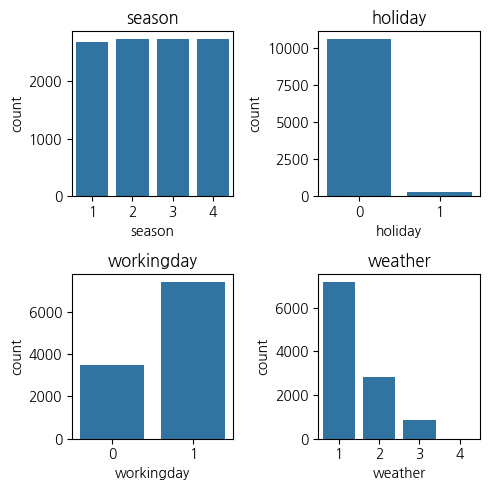

In [79]:
# ---------------------------
# 각 범주별 데이터 빈도수 시각화
# ---------------------------

fig, ax = plt.subplots(2,2, figsize=(5,5))
axes = ax.flatten()

for i, feature in enumerate(cat_cols):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
    
plt.tight_layout()

In [80]:
# ---------------------------
# 각 범주별 데이터 빈도수
# ---------------------------
for i, feature in enumerate(cat_cols):
    display(df[feature].value_counts())

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

holiday
0    10575
1      311
Name: count, dtype: int64

workingday
1    7412
0    3474
Name: count, dtype: int64

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

## 수치형 변수
- 각 데이터의 분포

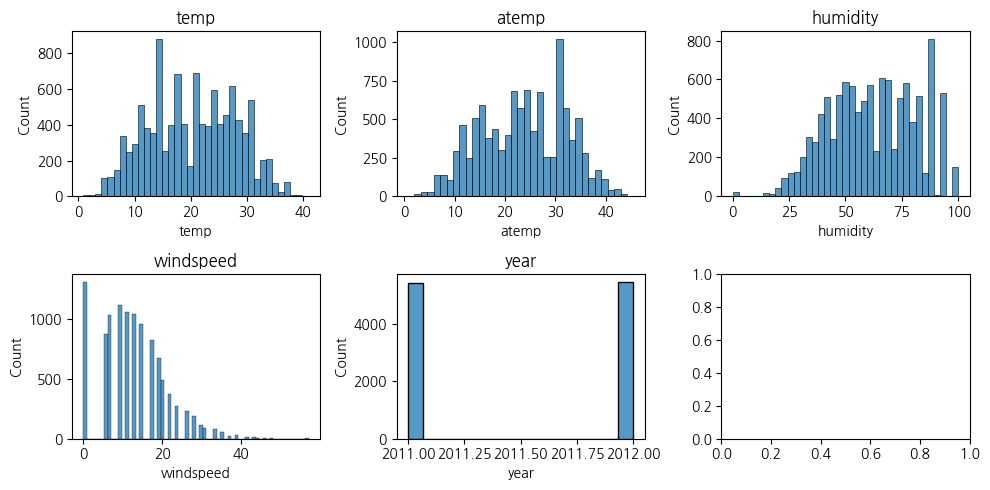

In [81]:
# ---------------------------
# 수치형 데이터의 분포 시각화
# ---------------------------
fig, ax = plt.subplots(2,3, figsize=(10,5))
axes = ax.flatten()

for i, feature in enumerate(num_cols):
    sns.histplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
    
plt.tight_layout()

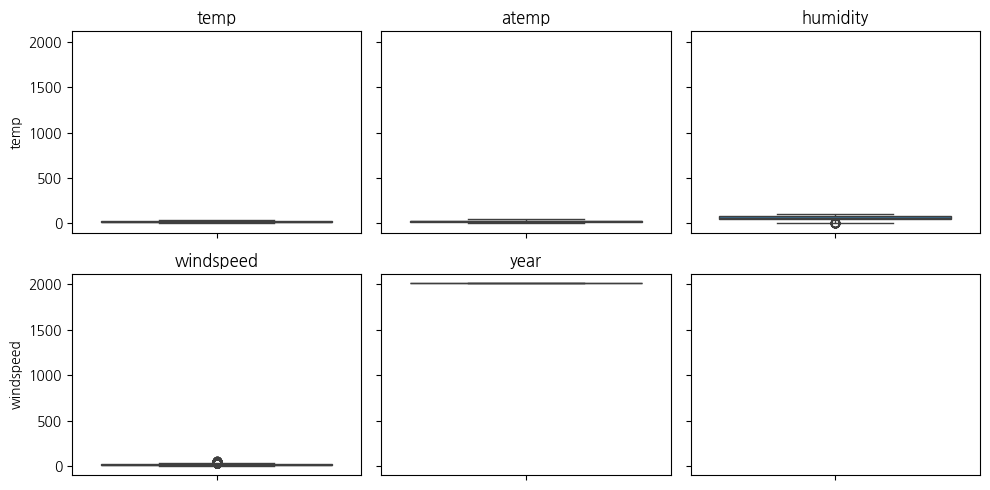

In [82]:
# ---------------------------
# 수치형 데이터 박스플롯
# ---------------------------
fig, ax = plt.subplots(2,3, figsize=(10,5), sharex=True, sharey=True)
axes = ax.flatten()

for i, feature in enumerate(num_cols):
    sns.boxplot(y=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
    
plt.tight_layout()

In [83]:
# ---------------------------
# 수치형 데이터의 요약통계
# ---------------------------
df[num_cols].describe()

,temp,atemp,humidity,windspeed,year
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,2011.501929
std,7.79159,8.474601,19.245033,8.164537,0.500019
min,0.82000,0.760000,0.000000,0.000000,2011.000000
25%,13.94000,16.665000,47.000000,7.001500,2011.000000
50%,20.50000,24.240000,62.000000,12.998000,2012.000000
75%,26.24000,31.060000,77.000000,16.997900,2012.000000
max,41.00000,45.455000,100.000000,56.996900,2012.000000


## 독립변수와 종속변수의 관계

### 범주형 변수
- 막대그래프로 확인

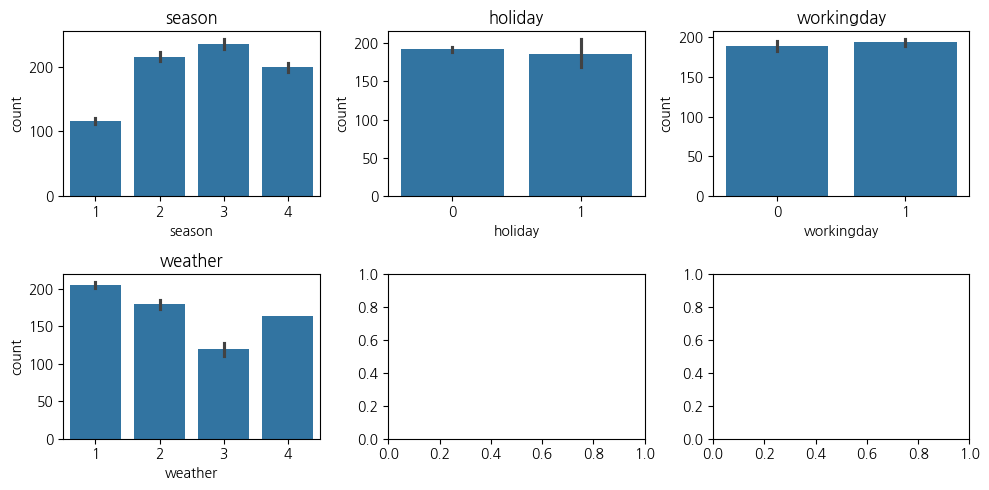

In [84]:
fig, ax = plt.subplots(2,3, figsize=(10,5))
axes = ax.flatten()

for i, feature in enumerate(cat_cols):
    sns.barplot(x=feature, y='count', data=df, ax=axes[i])
    axes[i].set_title(feature)
    
plt.tight_layout()

### 수치형 변수
- 산점도로 확인

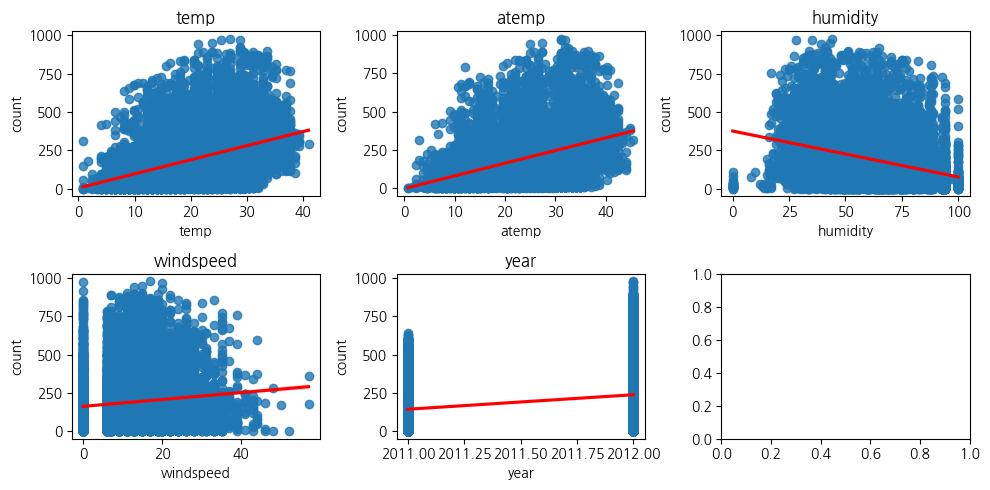

In [85]:
fig, ax = plt.subplots(2,3, figsize=(10,5))
axes = ax.flatten()

for i, feature in enumerate(num_cols):
    sns.regplot(x=feature, y='count', data=df, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(feature)
    
plt.tight_layout()

## 순환형
- lineplot

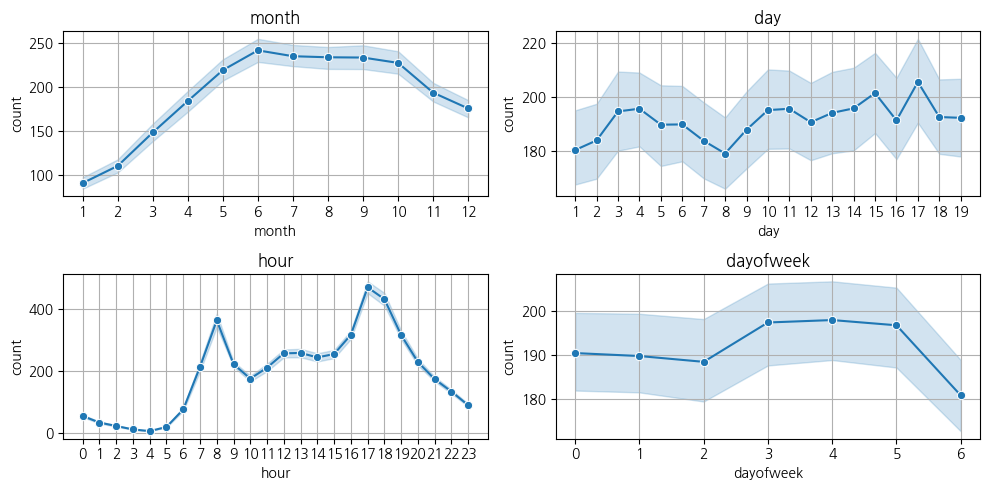

In [86]:
fig, ax = plt.subplots(2,2, figsize=(10,5))
axes = ax.flatten()

for i, feature in enumerate(cycle_cols):
    sns.lineplot(x=feature, y='count', data=df, ax=axes[i], marker='o')
    axes[i].set_title(feature)
    xticks = df[feature].unique()
    axes[i].set_xticks(xticks)
    axes[i].grid()
    
plt.tight_layout()

In [87]:
# -----------------------------
# 시간대 - 요일 별 평균 대여량
# -----------------------------


## 상관계수
* 피어슨 상관계수
    * 두 변수 간의 선형 관계의 강도와 방향을 측정.
    * 파이썬에서 corr()함수를 이용하여 구할 수 있음.
    * +1과 -1 사이의 값을 가진다.
        * +1 : 완벽한 양의 선형 상관 관계
        * -1 : 완벽한 음의 상관관계
        * 0 : 선형 상관 관계 없음,
    
* 다중공선성
    * 독립변수 간 강한 상관관계가 있는 경우
    * 둘중 하나의 변수만 사용

In [94]:
corr = abs(df[['temp', 'atemp', 'humidity', 'windspeed', 'year', 'count']].corr())
corr

,temp,atemp,humidity,windspeed,year,count
temp,1.000000,0.984948,0.064949,0.017852,0.061226,0.394454
atemp,0.984948,1.000000,0.043536,0.057473,0.058540,0.389784
humidity,0.064949,0.043536,1.000000,0.318607,0.078606,0.317371
windspeed,0.017852,0.057473,0.318607,1.000000,0.015221,0.101369
year,0.061226,0.058540,0.078606,0.015221,1.000000,0.260403
count,0.394454,0.389784,0.317371,0.101369,0.260403,1.000000


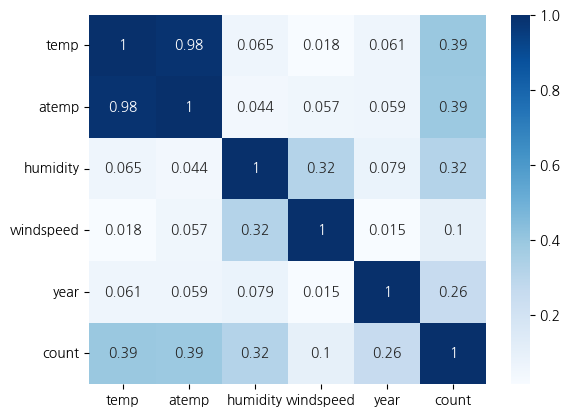

In [99]:
sns.heatmap(corr, cmap='Blues', annot=True);

<Axes: >

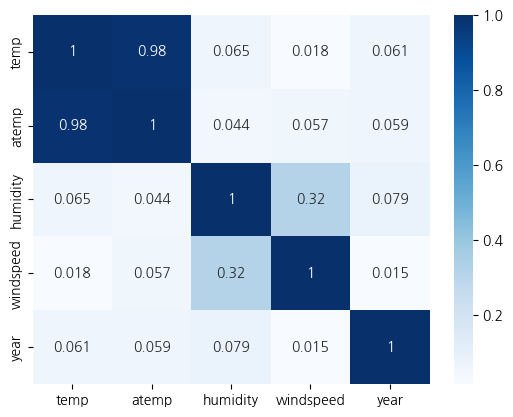

In [47]:
sns.heatmap(abs(df[num_cols].corr()), cmap='Blues', annot=True)